# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
# Baca file CSV
df = pd.read_csv('/content/used_car_hasil_clustering.csv', low_memory=False)

# Tampilkan 5 baris pertama dari dataframe
df.tail()

,Brand,Model,Year,Mileage,Price,Region,Target
3234,3,3,2009,52454.434859,43985.685895,0,1
3235,3,3,2009,106138.081265,46379.204754,3,0
3236,3,3,2011,116064.470924,45041.779562,0,0
3237,3,3,2006,190064.514507,45010.240238,3,2
3238,3,3,2022,181371.167991,44527.196092,4,2


In [6]:
df['Target'] = df['Target'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Brand    3239 non-null   int64   
 1   Model    3239 non-null   int64   
 2   Year     3239 non-null   int64   
 3   Mileage  3239 non-null   float64 
 4   Price    3239 non-null   float64 
 5   Region   3239 non-null   int64   
 6   Target   3239 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 155.2 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Split df menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi kolom numerik
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Normalisasi hanya pada data pelatihan dan terapkan pada data uji
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(2591, 6), y_train=(2591,)
Test set shape: X_test=(648, 6), y_test=(648,)


Normalisasi dilakukan setelah split dataset karena menghindari kebocoran data, karena kalau Normalisasi diterapkan ke seluruh dataset sebelum split. Ini berarti informasi dari data uji (X_test) sudah digunakan untuk menghitung skala (min dan max) pada data pelatihan (X_train).
Ini dianggap sebagai kebocoran data, karena model pelatihan secara tidak langsung mendapatkan informasi dari data uji.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)


    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Macro)': precision_score(y_test, y_pred,average='macro'),
        'Recall (Macro)': recall_score(y_test, y_pred,average='macro'),
        'F1-Score (Macro)': f1_score(y_test, y_pred,average='macro'),
        'Precision (Weighted)': precision_score(y_test, y_pred,average='weighted'),
        'Recall (Weighted)': recall_score(y_test, y_pred,average='weighted'),
        'F1-Score (Weighted)': f1_score(y_test, y_pred,average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision (Macro)': metrics['Precision (Macro)'],
        'Recall (Macro)': metrics['Recall (Macro)'],
        'F1-Score (Macro)': metrics['F1-Score (Macro)']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)


                          Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0     K-Nearest Neighbors (KNN)  0.992284           0.990888        0.993435   
1            Decision Tree (DT)  0.998457           0.998485        0.998826   
2            Random Forest (RF)  0.998457           0.998485        0.998826   
3  Support Vector Machine (SVM)  0.998457           0.998485        0.998826   
4              Naive Bayes (NB)  0.998457           0.998485        0.998826   

   F1-Score (Macro)  
0          0.992119  
1          0.998653  
2          0.998653  
3          0.998653  
4          0.998653  


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, model_name, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


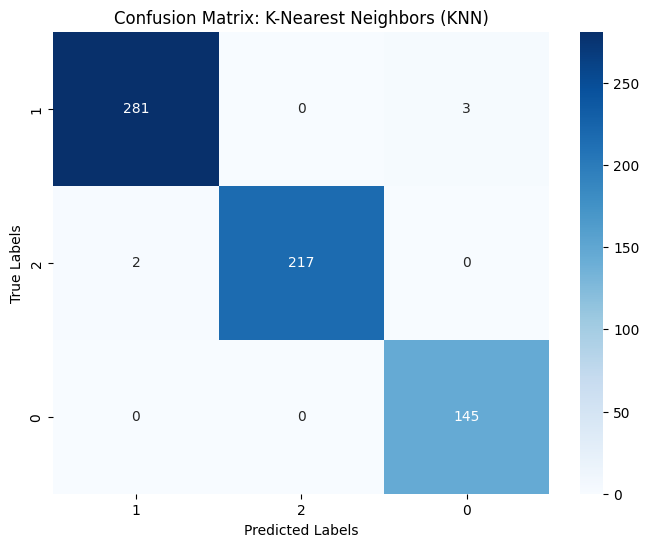

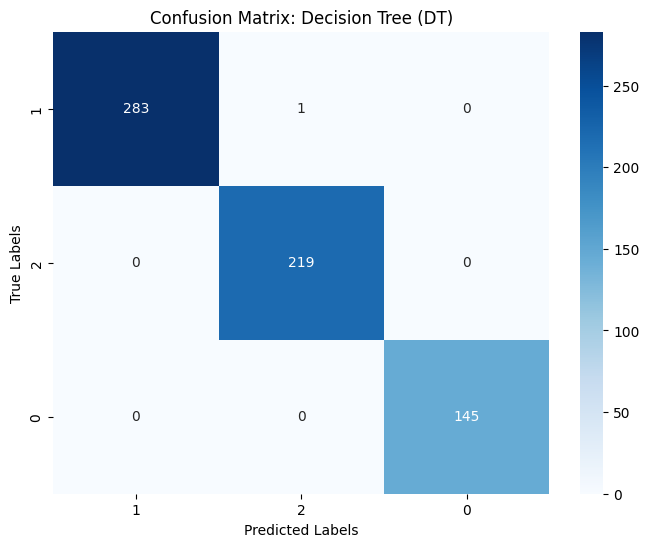

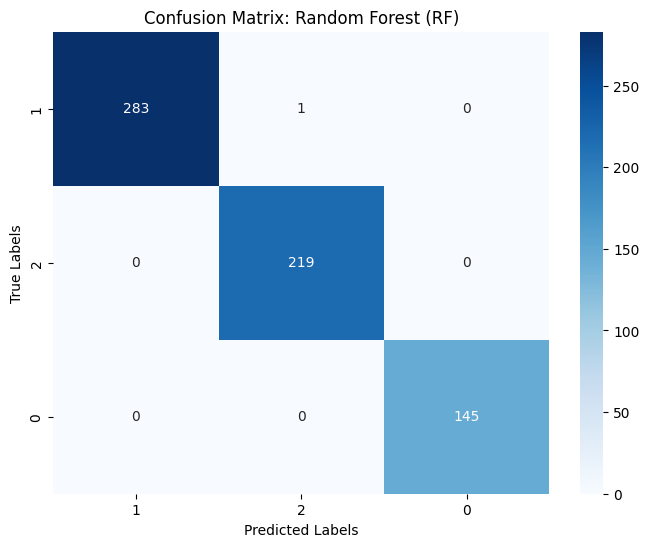

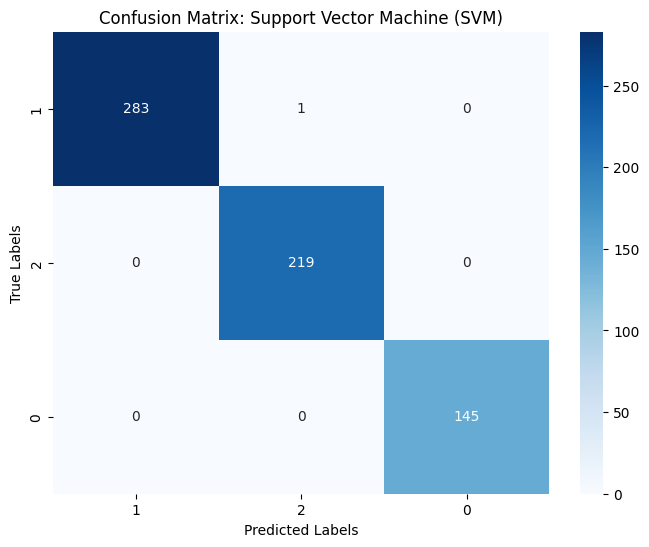

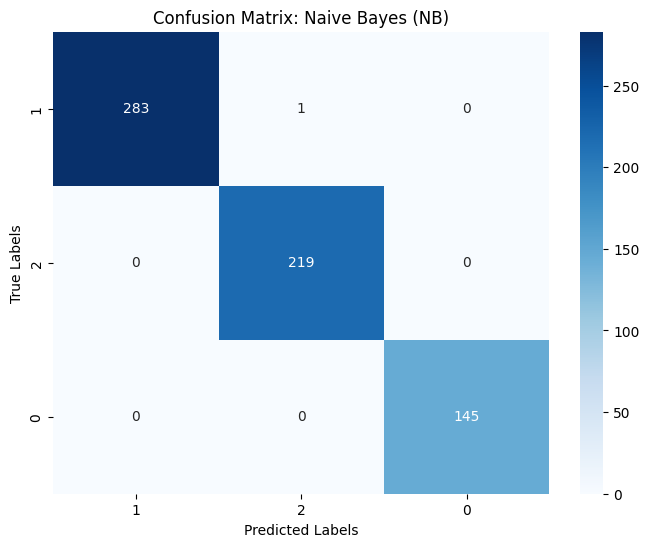

In [12]:
class_names = y_test.unique()  # Mengambil label unik dari data target

# Visualisasi confusion matrix untuk setiap model
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, model_name, class_names)


dari beberapa model machine learning yang dipakai, semuanya menunjukkan performa yang sangat bagus

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Berikut adalah hasil dari evaluasi beberapa model yang saya gunakan :**



*   **K-Nearest Neighbors (KNN)**
    
  *     **Accuracy  : 0.992284**                  

  *     **Precision  : 0.990888**

  *     **Recall : 0.993435**

  *     **F1-Score : 0.992119**
  *  **K-Nearest Neighbors (KNN)** menunjukkan akurasi sebesar 99.23%, dengan precision 99.08%, recall 99.34%, dan F1-Score 99.21%. Tingginya precision mengindikasikan bahwa model ini sangat andal dalam menghindari false positives, sementara recall yang tinggi menunjukkan bahwa KNN cukup baik dalam menangkap semua cluster yang relevan. F1-Score yang tinggi menunjukkan keseimbangan yang sangat baik antara precision dan recall, menjadikan model ini salah satu kandidat andal.

*   **Decision Tree (DT)**
                       
  *     **Accuracy  : 0.998457**                  

  *     **Precision  : 0.998485**

  *     **Recall : 0.998826**

  *     **F1-Score : 0.998653**
  *   Decision Tree (DT) memperoleh akurasi 99.85%, dengan precision, recall, dan F1-Score masing-masing mencapai 99.85%, 99.88%, dan 99.87%. Model ini memberikan hasil yang hampir sempurna dalam mengklasifikasikan cluster, dengan kemampuan menangkap semua instance yang relevan sekaligus meminimalkan kesalahan prediksi.

*   **Random Forest (RF)**
    
  *     **Accuracy  : 0.998457**                  

  *     **Precision  : 0.998485**

  *     **Recall : 0.998826**

  *     **F1-Score : 0.998653**
  *   Random Forest (RF) juga memberikan hasil yang sangat baik, dengan akurasi 99.85%, precision 99.85%, recall 99.88%, dan F1-Score 99.87%. Performa ini sebanding dengan Decision Tree, tetapi keunggulan ensemble learning pada Random Forest memberikan stabilitas lebih baik dan kemungkinan overfitting yang lebih rendah dibandingkan model Decision Tree.

*   **Support Vector Machine (SVM)**
    
  *     **Accuracy  : 0.998457**                  

  *     **Precision  : 0.998485**

  *     **Recall : 0.998826**

  *     **F1-Score : 0.998653**

  *   Support Vector Machine (SVM) memiliki performa yang sama tinggi dengan akurasi 99.85%, precision 99.85%, recall 99.88%, dan F1-Score 99.87%. Hasil ini menunjukkan bahwa SVM sangat andal dalam memisahkan cluster berdasarkan hyperplane optimalnya, dengan tingkat kesalahan prediksi yang sangat minim.

*   **Naive Bayes (NB)**
    
  *     **Accuracy  : 0.998457**                  

  *     **Precision  : 0.998485**

  *     **Recall : 0.998826**

  *     **F1-Score : 0.998653**
  *   Naive Bayes (NB), meskipun sering kali dianggap sederhana, juga mencapai hasil sempurna dengan akurasi 99.85%, precision 99.85%, recall 99.88%, dan F1-Score 99.87%. Performa ini menunjukkan bahwa dataset memiliki pola distribusi yang sangat jelas, memungkinkan Naive Bayes bekerja dengan sangat baik.

*   **Kesimpulan**
    
  *  Semua model memberikan hasil yang sangat tinggi dengan perbedaan performa yang minimal. Namun, Random Forest dan Support Vector Machine (SVM) dapat dianggap sebagai kandidat utama untuk implementasi lebih lanjut, karena keduanya menawarkan keunggulan dalam stabilitas dan generalisasi. Decision Tree juga memiliki performa luar biasa, tetapi mungkin lebih rentan terhadap overfitting dibandingkan Random Forest. Naive Bayes memberikan hasil yang mengejutkan baik, tetapi penggunaannya tergantung pada asumsi distribusi data yang sesuai. KNN juga layak dipertimbangkan, terutama jika interpretasi hasil menjadi prioritas utama. Untuk memastikan generalisasi performa ini, disarankan untuk menggunakan cross-validation sebagai langkah validasi tambahan.




